<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [2]:
df = pd.read_csv("Churn.csv")

## EDA

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## Data Preprocessing

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Strorytelling - Visualization

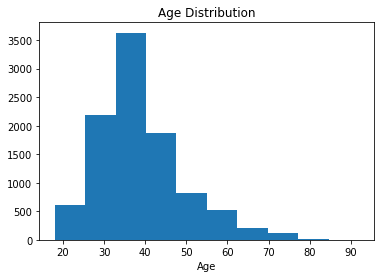

In [9]:
plt.hist(df['Age'])
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

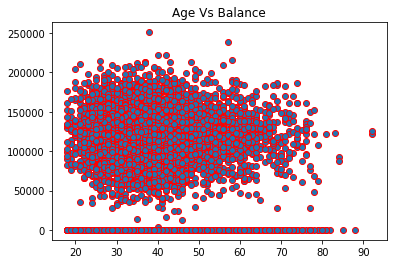

In [10]:
plt.scatter(df['Age'], df['Balance'],edgecolors='Red')
plt.title("Age Vs Balance")
plt.show()

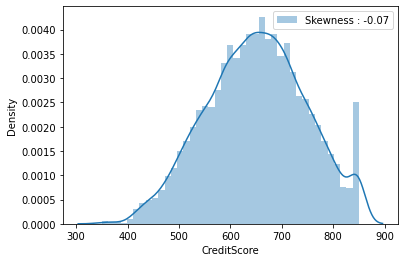

In [11]:
sns.distplot(df["CreditScore"], label="Skewness : %.2f"%(df["CreditScore"].skew()))
plt.legend(loc="best");

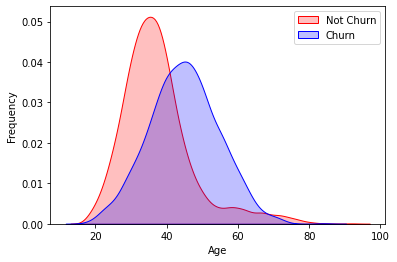

In [12]:
plot = sns.kdeplot(df["Age"][(df["Exited"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
plot = sns.kdeplot(df["Age"][(df["Exited"] == 1) & (df["Age"].notnull())], ax =plot, color="Blue", shade= True)
plot.set_xlabel("Age")
plot.set_ylabel("Frequency")
plot = plot.legend(["Not Churn","Churn"])

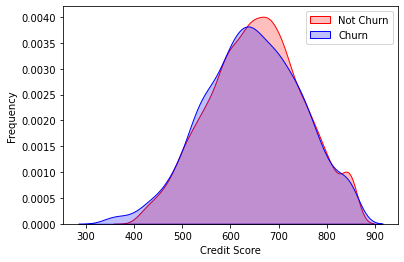

In [13]:
plot = sns.kdeplot(df["CreditScore"][(df["Exited"] == 0) & (df["CreditScore"].notnull())], color="Red", shade = True)
plot = sns.kdeplot(df["CreditScore"][(df["Exited"] == 1) & (df["CreditScore"].notnull())], ax =plot, color="Blue", shade= True)
plot.set_xlabel("Credit Score")
plot.set_ylabel("Frequency")
plot = plot.legend(["Not Churn","Churn"])

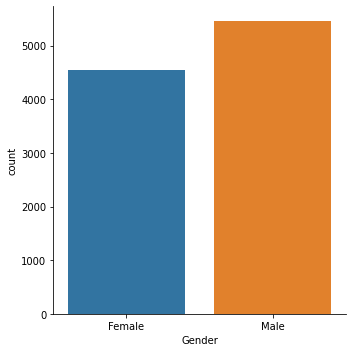

In [14]:
sns.factorplot('Gender',data=df,kind='count')

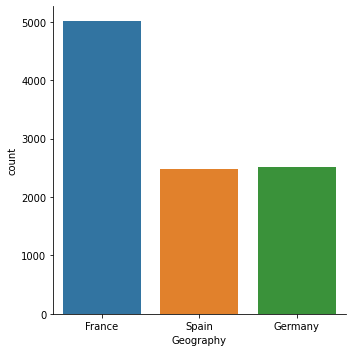

In [15]:
sns.factorplot('Geography',data=df,kind='count')

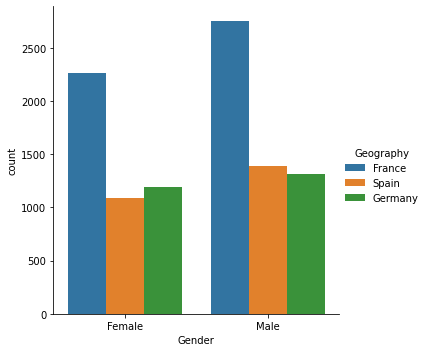

In [16]:
sns.factorplot('Gender',data=df,hue='Geography',kind='count')

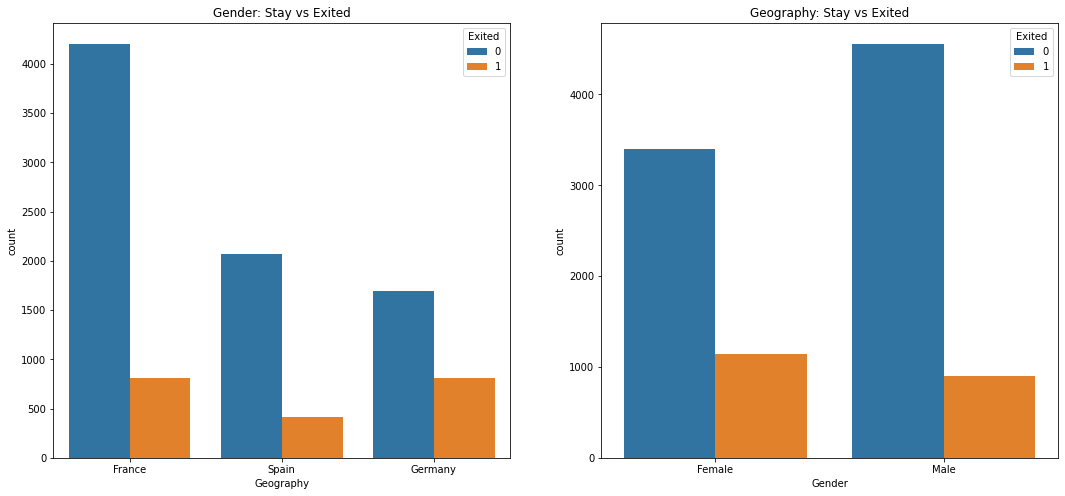

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.countplot('Gender', hue = "Exited", data = df, ax = ax[1])
sns.countplot("Geography", hue = "Exited", data = df, ax = ax[0])
ax[0].set_title("Gender: Stay vs Exited")
ax[1].set_title("Geography: Stay vs Exited")
plt.show()

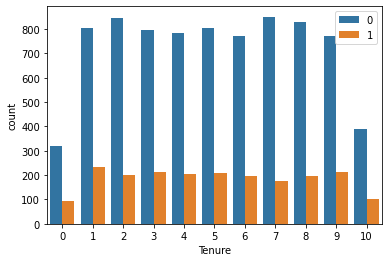

In [18]:
sns.countplot(df["Tenure"], hue=df["Exited"])
plt.legend(loc="best")

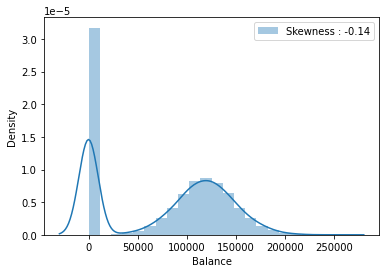

In [19]:
sns.distplot(df["Balance"], label="Skewness : %.2f"%(df["Balance"].skew()))
plt.legend(loc="best")

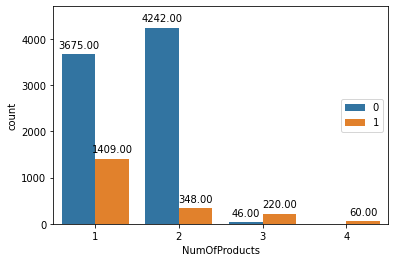

In [20]:
plot = sns.countplot(df["NumOfProducts"], hue=df["Exited"])

plt.ylim(0,4700)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    

plt.legend(loc="right")

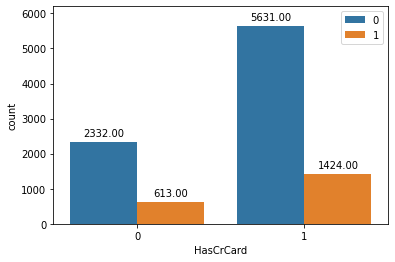

In [21]:
plot = sns.countplot(df["HasCrCard"], hue=df["Exited"])

plt.ylim(0,6200)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.legend(loc="best");

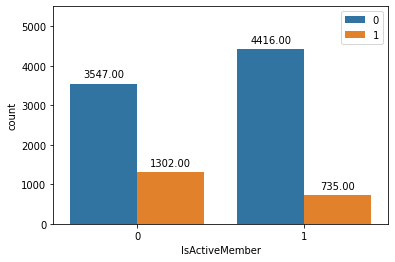

In [22]:
plot = sns.countplot(df["IsActiveMember"], hue=df["Exited"])

plt.ylim(0,5500)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.legend(loc="best")

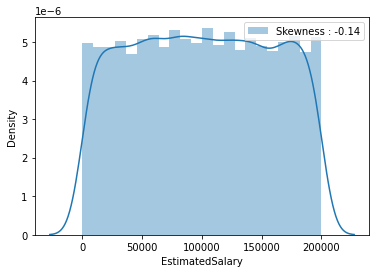

In [23]:
sns.distplot(df["EstimatedSalary"], label="Skewness : %.2f"%(df["Balance"].skew()))
plt.legend(loc="best")

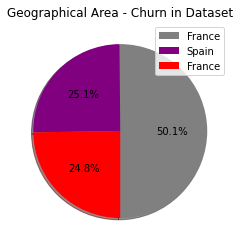

In [24]:
sizes = df['Geography'].value_counts(sort = True)
labels=df['Geography']
colors = ["grey","purple","red"] 

plt.pie(sizes,colors=colors,autopct='%1.1f%%',shadow=True,startangle=270)
plt.title('Geographical Area - Churn in Dataset')
plt.legend(labels)
plt.show()

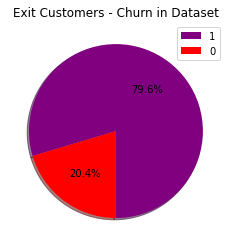

In [25]:
sizes = df['Exited'].value_counts(sort = True)
labels=df['Exited']
colors = ["purple","red"] 

plt.pie(sizes,colors=colors,autopct='%1.1f%%',shadow=True,startangle=270)
plt.title('Exit Customers - Churn in Dataset')
plt.legend(labels)
plt.show()

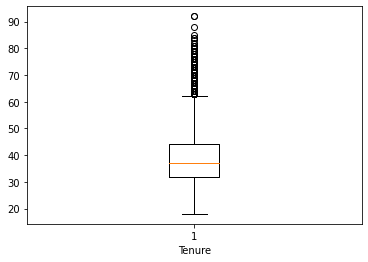

In [26]:
plt.boxplot(df['Age'])
plt.xlabel("Tenure")
plt.show()

<AxesSubplot:>

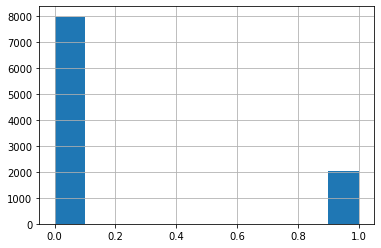

In [27]:
df['Exited'].hist()

<AxesSubplot:>

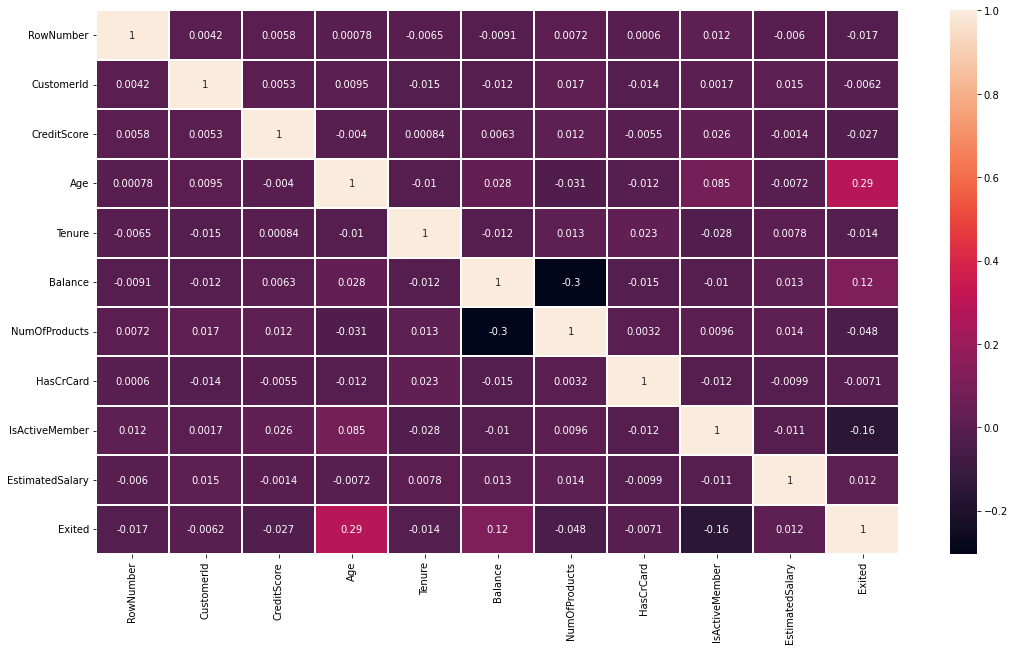

In [28]:
corr_data = pd.DataFrame(df)
plt.figure(figsize=(18,10))
sns.heatmap(corr_data.corr(),annot=True,linewidths=2)

## Prepare Data for Machine learning

In [29]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [32]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [33]:
# Convert Exited to categorical
df['Exited'] = df['Exited'].astype('category')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int64   
 1   Age                10000 non-null  int64   
 2   Tenure             10000 non-null  int64   
 3   Balance            10000 non-null  float64 
 4   NumOfProducts      10000 non-null  int64   
 5   HasCrCard          10000 non-null  int64   
 6   IsActiveMember     10000 non-null  int64   
 7   EstimatedSalary    10000 non-null  float64 
 8   Exited             10000 non-null  category
 9   Geography_Germany  10000 non-null  uint8   
 10  Geography_Spain    10000 non-null  uint8   
 11  Gender_Male        10000 non-null  uint8   
dtypes: category(1), float64(2), int64(6), uint8(3)
memory usage: 664.3 KB


In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Don't scale the target variable
target = df['Exited']
df.drop(['Exited'],axis=1,inplace=True)
columns = df.columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df = pd.DataFrame(scaled_features, columns=columns)
df['Exited'] = target

In [36]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988,0


## Train your model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited',axis=1), df['Exited'], test_size=0.2, random_state=101)

#### Logistic Regression

Logistic Regression Accuracy:  0.804
Logistic Regression Cross validation score:  0.812875
Logistic Regression Classification report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1577
           1       0.62      0.19      0.29       423

    accuracy                           0.80      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.77      0.80      0.76      2000



Text(0.5, 1.05, 'Logistic Regression Confusion matrix')

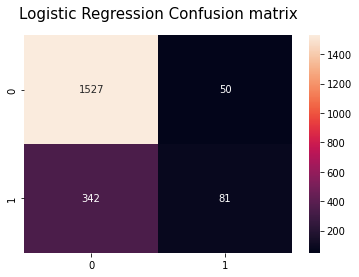

In [39]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
predict_lr = model_lr.predict(X_test)

print("Logistic Regression Accuracy: ", model_lr.score(X_test, y_test))
print("Logistic Regression Cross validation score: ", np.mean(cross_val_score(model_lr, X_train, y_train, cv=10)))
print("Logistic Regression Classification report:\n", metrics.classification_report(y_test, predict_lr))

sns.heatmap(confusion_matrix(y_test, predict_lr), annot=True, fmt="d")
plt.title('Logistic Regression Confusion matrix', y=1.05, size=15)

#### XGBoost

XGBoost Accuracy:  0.864
XGBoost Cross validation score:  0.852875
XGBoost Classification report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1577
           1       0.74      0.55      0.63       423

    accuracy                           0.86      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.86      0.86      2000



Text(0.5, 1.05, 'XGBoost Confusion matrix')

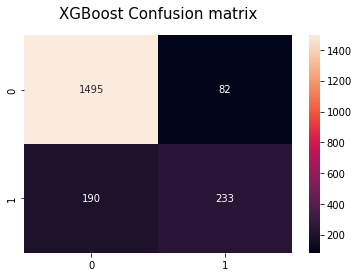

In [40]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
predict_xgb = model_xgb.predict(X_test)

print("XGBoost Accuracy: ", model_xgb.score(X_test, y_test))
print("XGBoost Cross validation score: ", np.mean(cross_val_score(model_xgb, X_train, y_train, cv=10)))
print("XGBoost Classification report:\n", metrics.classification_report(y_test, predict_xgb))

sns.heatmap(confusion_matrix(y_test, predict_xgb), annot=True, fmt="d")
plt.title('XGBoost Confusion matrix', y=1.05, size=15)

#### Gradient Boosting

Gradient Boosting Accuracy:  0.8675
Gradient Boosting Cross validation score:  0.8629999999999999
Gradient Boosting Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1577
           1       0.79      0.51      0.62       423

    accuracy                           0.87      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



Text(0.5, 1.05, 'Gradient Boosting Confusion matrix')

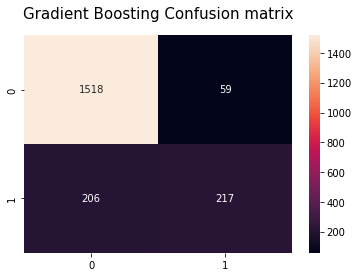

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train,y_train)
predict_gb = model_gb.predict(X_test)

print("Gradient Boosting Accuracy: ", model_gb.score(X_test, y_test))
print("Gradient Boosting Cross validation score: ", np.mean(cross_val_score(model_gb, X_train, y_train, cv=10)))
print("Gradient Boosting Classification report:\n", metrics.classification_report(y_test, predict_gb))

sns.heatmap(confusion_matrix(y_test, predict_gb), annot=True, fmt="d")
plt.title('Gradient Boosting Confusion matrix', y=1.05, size=15)

#### KNN or k-Nearest Neighbors

KNN Accuracy:  0.8235
KNN Cross validation score:  0.8251250000000001
KNN Classification report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1577
           1       0.64      0.38      0.47       423

    accuracy                           0.82      2000
   macro avg       0.75      0.66      0.68      2000
weighted avg       0.81      0.82      0.81      2000



Text(0.5, 1.05, 'KNN Confusion matrix')

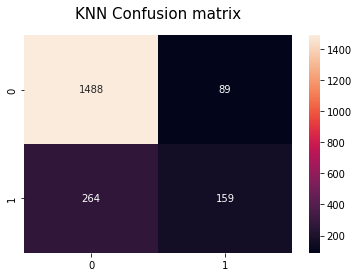

In [42]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
predict_knn = model_knn.predict(X_test)

print("KNN Accuracy: ", model_knn.score(X_test, y_test))
print("KNN Cross validation score: ", np.mean(cross_val_score(model_knn, X_train, y_train, cv=10)))
print("KNN Classification report:\n", metrics.classification_report(y_test, predict_knn))

sns.heatmap(confusion_matrix(y_test, predict_knn), annot=True, fmt="d")
plt.title('KNN Confusion matrix', y=1.05, size=15)

#### Support Vector Machines

SVM Accuracy:  0.7885
SVM Cross validation score:  0.79825
SVM Classification report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1577
           1       0.00      0.00      0.00       423

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000



Text(0.5, 1.05, 'SVM Confusion matrix')

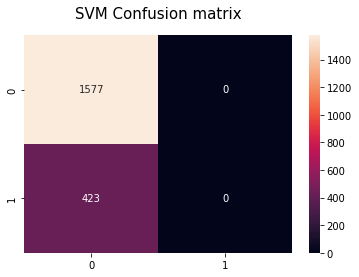

In [43]:
from sklearn import svm

model_svm = svm.SVC(kernel="linear", C=1, gamma=0.1)
model_svm.fit(X_train, y_train)
predict_svm = model_svm.predict(X_test)

print("SVM Accuracy: ", model_svm.score(X_test, y_test))
print("SVM Cross validation score: ", np.mean(cross_val_score(model_svm, X_train, y_train, cv=10)))
print("SVM Classification report:\n", metrics.classification_report(y_test, predict_svm))

sns.heatmap(confusion_matrix(y_test, predict_svm), annot=True, fmt="d")
plt.title('SVM Confusion matrix', y=1.05, size=15)

#### Naive Bayes classifier

Naive Bayes Accuracy:  0.8255
Naive Bayes Cross validation score:  0.8225
Naive Bayes Classification report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1577
           1       0.66      0.36      0.47       423

    accuracy                           0.83      2000
   macro avg       0.75      0.65      0.68      2000
weighted avg       0.81      0.83      0.80      2000



Text(0.5, 1.05, 'Naive Bayes Confusion matrix')

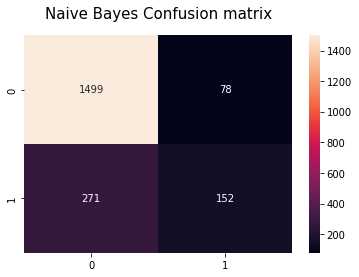

In [44]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb = model_nb.fit(X_train,y_train)
predict_nb = model_nb.predict(X_test)

print("Naive Bayes Accuracy: ", model_nb.score(X_test, y_test))
print("Naive Bayes Cross validation score: ", np.mean(cross_val_score(model_nb, X_train, y_train, cv=10)))
print("Naive Bayes Classification report:\n", metrics.classification_report(y_test, predict_nb))

sns.heatmap(confusion_matrix(y_test, predict_nb), annot=True, fmt="d")
plt.title('Naive Bayes Confusion matrix', y=1.05, size=15)

#### Decision Tree

Decision Tree Accuracy:  0.7885
Decision Tree Cross validation score:  0.796125
Decision Tree Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1577
           1       0.50      0.54      0.52       423

    accuracy                           0.79      2000
   macro avg       0.69      0.70      0.69      2000
weighted avg       0.79      0.79      0.79      2000



Text(0.5, 1.05, 'Decision Tree Confusion matrix')

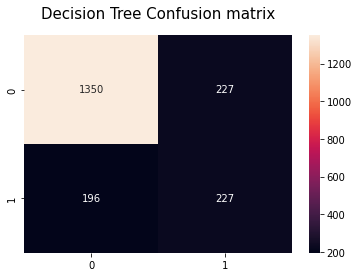

In [45]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion = "gini")
model_dt.fit(X_train, y_train)
predict_dt = model_dt.predict(X_test)

print("Decision Tree Accuracy: ", model_dt.score(X_test, y_test))
print("Decision Tree Cross validation score: ", np.mean(cross_val_score(model_dt, X_train, y_train, cv=10)))
print("Decision Tree Classification report:\n", metrics.classification_report(y_test, predict_dt))

sns.heatmap(confusion_matrix(y_test, predict_dt), annot=True, fmt="d")
plt.title('Decision Tree Confusion matrix', y=1.05, size=15)

#### Random Forest

Random Forest Accuracy:  0.8695
Random Forest Cross validation score:  0.861125
Random Forest Classification report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1577
           1       0.82      0.49      0.61       423

    accuracy                           0.87      2000
   macro avg       0.85      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



Text(0.5, 1.05, 'Random Forest Confusion matrix')

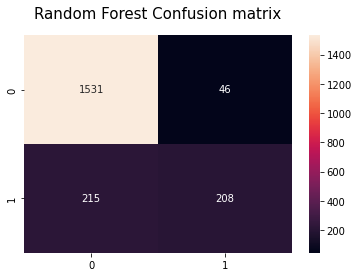

In [46]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=100)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)

print("Random Forest Accuracy: ", model_rf.score(X_test, y_test))
print("Random Forest Cross validation score: ", np.mean(cross_val_score(model_rf, X_train, y_train, cv=10)))
print("Random Forest Classification report:\n", metrics.classification_report(y_test, predict_rf))

sns.heatmap(confusion_matrix(y_test, predict_rf), annot=True, fmt="d")
plt.title('Random Forest Confusion matrix', y=1.05, size=15)

#### Artificial neural network (ANN)

In [47]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [48]:
model = Sequential()
model.add(Dense(units = 10, kernel_initializer = "he_normal", activation = "relu", input_dim = 11))
model.add(Dropout(0.3))
model.add(Dense(units=20, kernel_initializer="he_normal", activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units=15, kernel_initializer="he_normal", activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [49]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [50]:
model_fit = model.fit(X_train, y_train, validation_split = 0.25, batch_size=10, epochs=100)

Epoch 1/100
600/600 [==============================] - 3s 4ms/step - loss: 0.6094 - accuracy: 0.7450 - val_loss: 0.4864 - val_accuracy: 0.8025
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.5334 - accuracy: 0.7915 - val_loss: 0.4614 - val_accuracy: 0.8025
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.5030 - accuracy: 0.7995 - val_loss: 0.4442 - val_accuracy: 0.8025
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4785 - accuracy: 0.8002 - val_loss: 0.4307 - val_accuracy: 0.8025
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4594 - accuracy: 0.8080 - val_loss: 0.4129 - val_accuracy: 0.8090
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4577 - accuracy: 0.8097 - val_loss: 0.4085 - val_accuracy: 0.8085
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4474 - accuracy: 0.8103 - val_loss: 0.4071 - val_accuracy: 0.8095

In [51]:
print(model_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


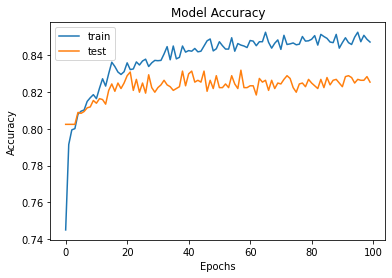

In [52]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['train','test'], loc = 'upper left')
plt.show()

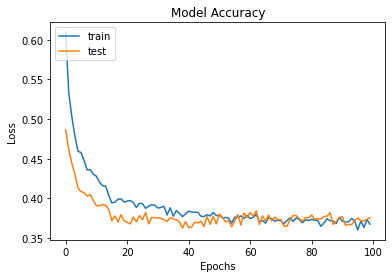

In [53]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [54]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [55]:
y_pred

array([[0.05368365],
       [0.03414907],
       [0.29057667],
       ...,
       [0.05089373],
       [0.22972663],
       [0.28052542]], dtype=float32)

In [56]:
y_pred = (y_pred>0.5)

In [57]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1575,    2],
       [ 357,   66]], dtype=int64)

In [58]:
acc_sc = accuracy_score(y_test, y_pred)
acc_sc

0.8205

## Test the model and show the metrics

## Save your final model

## Send us the Result (Maktabkhoone)